# Lab 1

### Task 1

In [1]:
import duckdb
import pandas as pd
from pathlib import Path


duckdb_path = "data/sakila.db"
Path(duckdb_path).unlink(missing_ok=True)
con = duckdb.connect(duckdb_path)
with open("sql/load_sakila.sql") as ingest_script:
    con.sql(ingest_script.read())

print("Database loaded.")

Database loaded.


In [2]:
# a) Which movies are longer than 3 hours (180 minutes)?
df_long_movies = con.sql("""
SELECT
    title,
    length as film_length
FROM
    sakila.main.film
WHERE
    length > 180
ORDER BY
    film_length DESC;
""").df()

df_long_movies

,title,film_length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185
5,GANGS PRIDE,185
6,HOME PITY,185
7,SOLDIERS EVOLUTION,185
8,POND SEATTLE,185
9,MUSCLE BRIGHT,185


In [3]:
# b) Which movies have the word "love" in its title? Show the following columns: title, rating, length, description
df_love_in_title = con.sql("""
SELECT
    title,
    rating,
    length,
    description
FROM
    sakila.main.film
WHERE
    title ILIKE '%love%';
""").df()

df_love_in_title

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [4]:
# c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and longest movie length
df_stats_movies = con.sql("""
SELECT
    MIN(length) as min_length,
    AVG(length) as avg_length,
    MEDIAN (length) as median_length,
    MAX(length) as max_length
FROM
    sakila.main.film;
""").df()

df_stats_movies

,min_length,avg_length,median_length,max_length
0,46,115.272,114.0,185


In [5]:
# d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can
# keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.

df_daily_cost = con.sql("""
SELECT
    title,
    rental_rate,
    rental_duration,
    (rental_rate / rental_duration) AS max_date_diff
FROM
    sakila.main.film
ORDER BY
    max_date_diff DESC
LIMIT
    10;
""").df()

df_daily_cost

,title,rental_rate,rental_duration,max_date_diff
0,AMERICAN CIRCUS,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BILKO ANONYMOUS,4.99,3,1.663333
3,BEAST HUNCHBACK,4.99,3,1.663333
4,CARIBBEAN LIBERTY,4.99,3,1.663333
5,AUTUMN CROW,4.99,3,1.663333
6,CASPER DRAGONFLY,4.99,3,1.663333
7,ACE GOLDFINGER,4.99,3,1.663333
8,BEHAVIOR RUNAWAY,4.99,3,1.663333
9,CASUALTIES ENCINO,4.99,3,1.663333


In [6]:
# e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have played in.

df_actor_num_movies = con.sql("""
SELECT
    a.first_name,
    a.last_name,
    COUNT(*) AS total_movies
FROM
    sakila.main.film f
    LEFT JOIN sakila.main.film_actor fa USING (film_id)
    LEFT JOIN sakila.main.actor a USING (actor_id)
GROUP BY
    a.first_name,
    a.last_name
ORDER BY
    total_movies DESC
LIMIT
    10;
""").df()

df_actor_num_movies

,first_name,last_name,total_movies
0,SUSAN,DAVIS,54
1,GINA,DEGENERES,42
2,WALTER,TORN,41
3,MARY,KEITEL,40
4,MATTHEW,CARREY,39
5,SANDRA,KILMER,37
6,SCARLETT,DAMON,36
7,GROUCHO,DUNST,35
8,VIVIEN,BASINGER,35
9,HENRY,BERRY,35


In [7]:
# f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5 questions you want to answer and then answer them using pandas and duckdb.

# Which actor has appeared in the most movies within each genre?
df_genre_movies = con.sql("""
SELECT
    a.first_name,
    a.last_name,
    c.name AS genre,
    COUNT(*) AS total_movies
FROM
    sakila.main.actor a
    LEFT JOIN sakila.main.film_actor fa USING (actor_id)
    LEFT JOIN sakila.main.film_category fc USING (film_id)
    LEFT JOIN sakila.main.category c USING (category_id)
GROUP BY
    a.first_name,
    a.last_name,
    genre
ORDER BY
    total_movies DESC
LIMIT
    5;
""").df()

df_genre_movies

,first_name,last_name,genre,total_movies
0,BEN,WILLIS,Sports,9
1,GINA,DEGENERES,Sci-Fi,7
2,GRACE,MOSTEL,Drama,7
3,HUMPHREY,WILLIS,Foreign,7
4,SIDNEY,CROWE,New,7


In [8]:
# Which top 5 countries have the most registered customers?

df_countries_customer = con.sql("""
SELECT
    co.country,
    COUNT(customer_id) AS total_customers
FROM
    sakila.main.customer c
    LEFT JOIN sakila.main.address USING (address_id)
    LEFT JOIN sakila.main.city ci USING (city_id)
    LEFT JOIN sakila.main.country co USING (country_id)
GROUP BY
    co.country
ORDER BY
    total_customers DESC
LIMIT
    5;

""").df()

df_countries_customer

,country,total_customers
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30


In [9]:
# Which movie rating has generated the most total sales revenue?
df_rating_movies = con.sql("""
SELECT
    f.rating,
    SUM(amount) as total_sales
FROM
    sakila.main.film f
    LEFT JOIN sakila.main.inventory i USING (film_id)
    LEFT JOIN sakila.main.rental r USING (inventory_id)
    LEFT JOIN sakila.main.payment p USING (rental_id)
GROUP BY
    f.rating
ORDER BY
    total_sales DESC;
""").df()

df_rating_movies

,rating,total_sales
0,PG-13,15259.16
1,NC-17,13875.07
2,PG,13337.91
3,R,13270.19
4,G,11664.23


In [10]:
# Which staff member is the 'Employee of the Month' based on total processed payments?
df_employee_month = con.sql("""
SELECT
    s.staff_id,
    s.first_name,
    s.last_name,
    SUM(amount) as total_sales
FROM
    sakila.main.staff s
    LEFT JOIN sakila.main.payment p USING (staff_id)
GROUP BY
    s.staff_id,
    s.first_name,
    s.last_name
ORDER BY
    total_sales DESC;

""").df()

df_employee_month

,staff_id,first_name,last_name,total_sales
0,2,Jon,Stephens,33927.04
1,1,Mike,Hillyer,33489.47


In [11]:
# On average, which movies do customers keep the longest before returning them?

df_longest_rent = con.sql("""
SELECT
    f.title,
    AVG(return_date - rental_date) as top_movie
FROM
    sakila.main.film f
    LEFT JOIN sakila.main.inventory i USING (film_id)
    LEFT JOIN sakila.main.rental r USING (inventory_id)
WHERE
    r.return_date IS NOT NULL
GROUP BY
    f.title
ORDER BY
    top_movie DESC
LIMIT
    10;
""").df()

df_longest_rent

,title,top_movie
0,FLIGHT LIES,7 days 06:29:55
1,IMPACT ALADDIN,7 days 04:48:53.333336
2,AFRICAN EGG,7 days 02:33:32.727276
3,HARDLY ROBBERS,6 days 22:45:45
4,MADRE GABLES,6 days 19:29:00.000005
5,HUNTER ALTER,6 days 19:26:00
6,NOTORIOUS REUNION,6 days 18:14:17.142862
7,WAGON JAWS,6 days 17:55:54
8,MOTHER OLEANDER,6 days 17:33:34.285716
9,REDS POCUS,6 days 17:08:20


### Task 2

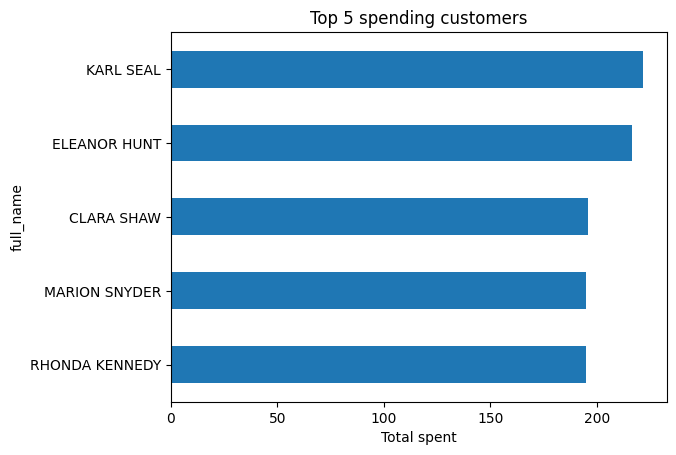

In [12]:
# a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them
# with special offers. Create a bar chart showing the top 5 customers by total spend.
import matplotlib.pyplot as plt

df_big_spenders = con.sql("""
SELECT
    c.first_name || ' ' || c.last_name as full_name,
    SUM(p.amount) as total_spent
FROM
    sakila.main.customer c
    LEFT JOIN sakila.main.payment p USING (customer_id)
GROUP BY
    full_name
ORDER BY
    total_spent DESC
LIMIT
    5;

""").df()

ax = df_big_spenders.plot(
    kind="barh", 
    x="full_name", 
    y="total_spent", 
    title = "Top 5 spending customers",
    xlabel="Total spent",
    legend=False
    ) 
ax.invert_yaxis()



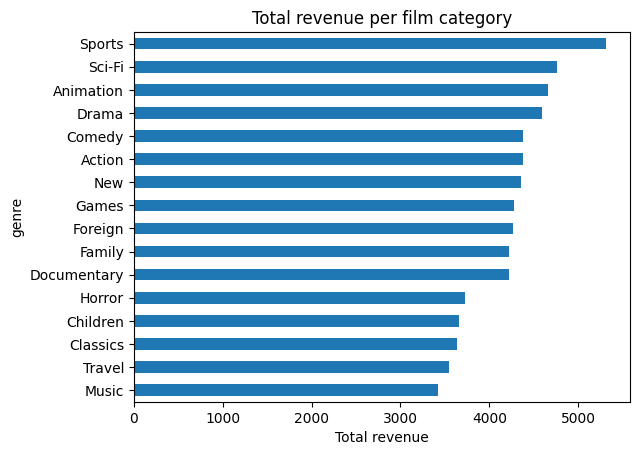

In [13]:
# b) How much money does each film category bring in? Make a bar chart showing total revenue per film category.

df_revenue_per_film_category = con.sql("""
SELECT
    c.name as genre,
    SUM(amount) as total_revenue
FROM
    sakila.main.category c
    LEFT JOIN sakila.main.film_category fc USING (category_id)
    LEFT JOIN sakila.main.film f USING (film_id)
    LEFT JOIN sakila.main.inventory i USING (film_id)
    LEFT JOIN sakila.main.rental r USING (inventory_id)
    LEFT JOIN sakila.main.payment p USING (rental_id)
GROUP BY
    genre
ORDER BY
    total_revenue DESC;
""").df()

ax = df_revenue_per_film_category.plot(
    kind="barh", 
    x="genre", 
    y="total_revenue", 
    title = "Total revenue per film category",
    xlabel="Total revenue",
    legend=False
    ) 
ax.invert_yaxis()